In [1]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data


Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
dog-vs-cat-images-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from zipfile import ZipFile

dataset = 'dog-vs-cat-images-data.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted")

The dataset is extracted


In [4]:
import os
path, dirs, files = next(os.walk(r'K:\vsenvi\DeepLearning\dogcat\train'))

file_count = len(files)

print("Total imgs : ", file_count)

Total imgs :  0


In [6]:
#Combining the train data

import random
import shutil

os.mkdir(r'K:\vsenvi\DeepLearning\dogcat\train_combined')

cat_dir = r'K:\vsenvi\DeepLearning\dogcat\train\cats'
dog_dir = r'K:\vsenvi\DeepLearning\dogcat\train\dogs'
train_dir = r'K:\vsenvi\DeepLearning\dogcat\train_combined'

def copy_files(source, destination):
    for file_name in os.listdir(source):
        file_path = os.path.join(source, file_name)
        if os.path.isfile(file_path):
            shutil.copy(file_path, os.path.join(destination, file_name))

# Copy files instead of moving
copy_files(cat_dir, train_dir)
copy_files(dog_dir, train_dir)

print("All images copied to train directory.")


All images copied to train directory.


In [7]:
path, dirs, files = next(os.walk(r'K:\vsenvi\DeepLearning\dogcat\train_combined'))

files_count = len(files)

print(files_count)

25000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

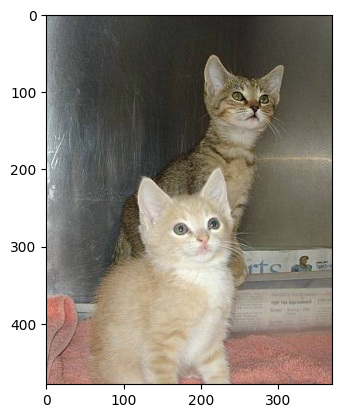

In [9]:
img1 = mpimg.imread(r'K:\vsenvi\DeepLearning\dogcat\train_combined\cat.27.jpg')
plt.imshow(img1)
plt.show()

In [10]:
img1.shape

(479, 370, 3)

In [11]:
os.mkdir(r'K:\vsenvi\DeepLearning\dogcat\train_resized')

In [ ]:
original_folder = r'K:\vsenvi\DeepLearning\dogcat\train_combined\\'
resized_folder = r'K:\vsenvi\DeepLearning\dogcat\train_resized\\'
file_list = os.listdir(original_folder)
random.shuffle(file_list)

for i in range(2500):

    file_name = file_list[i]
    img_path = original_folder + file_name

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    newimg_path = resized_folder + file_name
    img.save(newimg_path)

In [18]:
path, dirs, files = next(os.walk(r'K:\vsenvi\DeepLearning\dogcat\train_resized\\'))

files_count = len(files)
print(files_count)

2500


In [20]:
filename = os.listdir(r'K:\vsenvi\DeepLearning\dogcat\train_resized')

cat_count = 0
dog_count = 0

for name in filename:

    if name[0:3]=='cat':
        cat_count += 1

    else:
        dog_count += 1

print("Number of cats : ", cat_count)
print("Number of Dogs : ", dog_count)

Number of cats :  1272
Number of Dogs :  1228


In [21]:
filename1 = os.listdir(r'K:\vsenvi\DeepLearning\dogcat\train_resized')
labels = []

for i in range(2500):

    name1 = filename1[i]
    label = name1[0:3]

    if label == 'cat':
        labels.append(0)

    else:
        labels.append(1)

In [27]:
values, counts = np.unique(labels, return_counts=True)

print(values)
print(counts)
print(len(labels))

[0 1]
[1272 1228]
2500


In [30]:
import glob
import cv2

img_directory = r'K:\vsenvi\DeepLearning\dogcat\train_resized\\'
img_ext = ['png', 'jpg']

files = []

for ext in img_ext:
    files.extend(glob.glob(img_directory + f'*.{ext}'))

print("Total images : ", len(files))

dog_cat_imgs = np.asarray([cv2.imread(file) for file in files])


Total images :  2500


In [31]:
print(dog_cat_imgs)

[[[[216 222 221]
   [217 223 222]
   [219 224 223]
   ...
   [244 236 236]
   [248 240 240]
   [255 249 249]]

  [[214 220 219]
   [217 223 222]
   [220 225 224]
   ...
   [244 236 236]
   [246 238 238]
   [252 244 244]]

  [[214 220 219]
   [217 223 222]
   [221 226 225]
   ...
   [245 237 237]
   [244 236 236]
   [246 238 238]]

  ...

  [[219 216 212]
   [215 214 210]
   [211 212 208]
   ...
   [209 212 216]
   [208 211 219]
   [207 210 218]]

  [[219 217 216]
   [215 216 214]
   [209 212 210]
   ...
   [209 212 216]
   [208 211 219]
   [207 210 218]]

  [[217 215 214]
   [214 215 213]
   [207 210 208]
   ...
   [209 212 216]
   [207 210 218]
   [207 210 218]]]


 [[[ 62  62  62]
   [ 68  68  68]
   [ 64  64  64]
   ...
   [191 191 191]
   [191 191 191]
   [191 191 191]]

  [[ 58  58  58]
   [ 64  64  64]
   [ 61  61  61]
   ...
   [191 191 191]
   [191 191 191]
   [191 191 191]]

  [[ 54  54  54]
   [ 61  61  61]
   [ 59  59  59]
   ...
   [191 191 191]
   [191 191 191]
   [191 191

In [35]:
X = dog_cat_imgs
y = np.asarray(labels)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
#standardizing the X values

X_train_std = X_train/255
X_test_std = X_test/255

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable=False)

In [41]:
import tf_keras

model = tf_keras.Sequential([
                            pretrained_model,
                            tf_keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [42]:
model.compile(
    optimizer='adam',
    loss= tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
model.fit(X_train_std, y_train, epochs=5)

Epoch 1/5


k:\vsenvi\virenv\Lib\site-packages\tf_keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 41s 556ms/step - loss: 0.1394 - acc: 0.9535
Epoch 2/5
63/63 [==============================] - 32s 514ms/step - loss: 0.0712 - acc: 0.9775
Epoch 3/5
63/63 [==============================] - 32s 507ms/step - loss: 0.0581 - acc: 0.9815
Epoch 4/5
63/63 [==============================] - 32s 511ms/step - loss: 0.0496 - acc: 0.9835
Epoch 5/5
63/63 [==============================] - 29s 468ms/step - loss: 0.0433 - acc: 0.9875


In [44]:
score, acc = model.evaluate(X_test_std, y_test)

print(score)
print(acc)

k:\vsenvi\virenv\Lib\site-packages\tf_keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 13s 645ms/step - loss: 0.0589 - acc: 0.9800
0.05885620787739754
0.9800000190734863


In [47]:
def cv2_imshow(input_image):
    if input_image is None:
        print("Error: Image not found or path is incorrect")
    else:
        cv2.imshow("Displayed Image", input_image)
        cv2.waitKey(0)  # Wait for a key press
        cv2.destroyAllWindows()


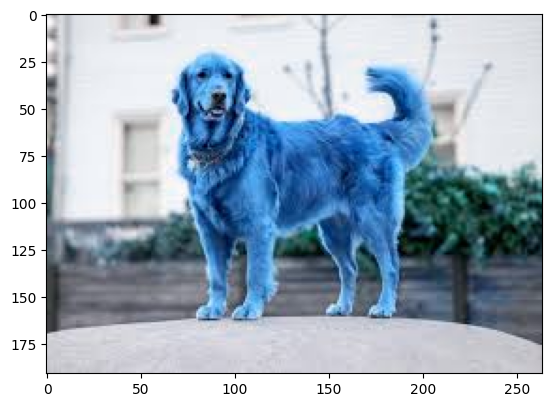

1/1 [==============================] - 0s 82ms/step
The image represents a Dog


In [52]:
input_img_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_img_path)

#cv2_imshow(input_image)
plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 224, 224,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label==0:
    print("The image represents a Cat")

else:
    print("The image represents a Dog")